In [1]:
# install package
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 30.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
# use Okt Korean analysis lib
from konlpy.tag import Okt

In [5]:
# Todo list
# BigKinds OpenAPI를 이용하여 topic 에 대한 데이터를 자동으로 가져온다

In [6]:
# OpenAPI를 연결하기 전에는 수동으로 데이터를 불러온다
df=pd.read_excel('news.xlsx')

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
df.head()

,뉴스 식별자,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
0,8.100101e+06,20250625,KBS,황현규,한은 “집값 상승 빨라 정책 대출에도 DSR 확대해야”,경제>금융_재테크,경제>부동산,경제>증권_증시,NaN,NaN,NaN,NaN,"서울,계산,인천,검단,금융안정기획부장,수도권","금융위,DSR,정부,한국은행,수도권","집값,상승,정책,대출,DSR,확대,앵커,수도,집값,상승,한국은행,정부,정책,대출,D...","한국은행,dsr,디딤돌,주택시장,부동산,수도권,황현규,인천,검단,정책대출,7천만,신...","[앵커]\n\n최근 수도권 집값이 가파르게 상승하자, 한국은행이 정부의 정책 대출에...",https://news.kbs.co.kr/news/view.do?ncd=828780...,NaN
1,1.100101e+06,20250625,경향신문,김지환 기자 baldkim@kyunghyang.com,"한은 “과도한 주택 정책대출, 가계부채 관리 어렵게 만들고 집값 상승 부추겨”",경제>금융_재테크,경제>부동산,경제>취업_창업,NaN,NaN,NaN,NaN,수도권,"DSR,정부,한국은행,한은","주택,정책,대출,가계,부채,관리,집값,상승,보금자리론,9년,200조,증가,DSR,규...","정책금융,정책대출,한은,주택담보대출,dsr,보금자리,315조,보금자리론","보금자리론 등 9년 새 200조 넘게 증가 “DSR 규제 적용, 고삐 좨야”\n\n...",https://www.khan.co.kr/article/202506252104005,NaN
2,1.100701e+06,20250625,세계일보,김수미,취약 자영업자 연체율 12.24% 12년 만에 최고,경제>금융_재테크,경제>부동산,경제>외환,NaN,NaN,NaN,이종렬,"서울지역,명동,서울,강남구,경기,강남,달맞이공원,압구정동,수도권,성동구","DSR,정부,한은은,저축은행,연합뉴스,한국은행,연합뉴스 ◆취약","취약,자영업자,연체,12.24%,12년,최고,경기,침체,장기화,취약,자영업자,대출,...","서울,한은,연체율,자영업자,원리금,dsr,정책대출,보고서,가계대출,자영업,강남,주택...",경기 침체가 장기화하면서 취약 자영업자의 대출 연체율이 12년 만에 최고치로 치솟았...,http://www.segye.com/content/html/2025/06/25/2...,NaN
3,8.100101e+06,20250625,KBS,황현규,"“한은, 집값 상승 빨라 정책 대출에도 DSR 확대해야”",경제>금융_재테크,경제>부동산,경제>외환,NaN,NaN,NaN,유상대,"서울,계산,인천,검단,금융안정기획부장,수도권","DSR,정부,서울,강남,한국은행,한은,수도권","한은,집값,상승,정책,대출,DSR,확대,앵커,서울,수도,집값,상승,한국은행,정부,정...","서울,한국은행,dsr,한은,디딤돌,상승률,다음달,수도권,황현규,유상대,7천만,인천,...",[앵커]\n\n 최근 서울을 비롯한 수도권 집값이 가파르게 상승하고 있죠.\n\n ...,https://news.kbs.co.kr/news/view.do?ncd=828761...,NaN
4,2.100701e+06,20250625,헤럴드경제,이용덕,‘북수원이목지구 디에트르 더 리체 Ⅱ’ 선착순 계약 진행 소비심리 회복에 실수요 관...,경제>부동산,NaN,NaN,NaN,NaN,NaN,NaN,"수원,이목지구,광교중앙역,호매실,양재,서울,강남권,가산,성균관대역,북수원IC,서둔동...","스타필드 수원,DSR,정부,사당,CCSI,북수원이목지구,한국은행,어린이도서관,롯데마...","북수원이목지구,디에트르,리체,진행,선착순,계약,소비,심리,회복,실수요,관심,7년,서...","서울,수원,계약금,소비자,북수원,이목지구,수도권,리체,디에트르,실수요,계약자,대출심...",- 서울 아파트값 7년 만의 최대 상승 수원 이목지구 브랜드 단지에 실수요 관심 \...,https://biz.heraldcorp.com/article/10517778,NaN


In [8]:
df['tot_data']=df['제목']+' '+df['본문']

In [9]:
df['tot_data'].head()

,tot_data
0,한은 “집값 상승 빨라 정책 대출에도 DSR 확대해야” [앵커]\n\n최근 수도권 ...
1,"한은 “과도한 주택 정책대출, 가계부채 관리 어렵게 만들고 집값 상승 부추겨” 보금..."
2,취약 자영업자 연체율 12.24% 12년 만에 최고 경기 침체가 장기화하면서 취약 ...
3,"“한은, 집값 상승 빨라 정책 대출에도 DSR 확대해야” [앵커]\n\n 최근 서울..."
4,‘북수원이목지구 디에트르 더 리체 Ⅱ’ 선착순 계약 진행 소비심리 회복에 실수요 관...


In [10]:
# Okt 형태소 분석기 객체를 생성합니다. 한국어 텍스트 분석을 위한 준비 단계입니다.
okt = Okt()

# 텍스트 데이터를 형태소 단위로 분석하여 특정 품사(명사, 형용사, 동사)만 추출하는 함수입니다.
def tokenizer(txt) :
    morph=okt.pos(txt)
    words=[]
    for word, tag in morph :
#        if tag in ['Noun', 'Adjective', 'Verb'] : # 명사, 동사, 형용사만 가져오도록
        if tag in ['Noun'] : # 명사만 가져오도록
            if len(word) > 1 :
                words.append(word)

    return words

In [11]:
df = df.astype('str')
df['tot_data']=df['tot_data'].apply(tokenizer)
df = df.astype('str')

In [12]:
df['tot_data'].head()

,tot_data
0,"['집값', '상승', '정책', '대출', '확대', '앵커', '최근', '수도..."
1,"['과도', '주택', '정책', '대출', '가계부채', '관리', '집값', '..."
2,"['취약', '자영', '업자', '연체', '최고', '경기', '침체', '장기..."
3,"['집값', '상승', '정책', '대출', '확대', '앵커', '최근', '서울..."
4,"['수원', '이목', '지구', '디에트르', '리체', '선착순', '계약', ..."


In [13]:
# 불용어 list 설정
stop_words = ['기자','객원', '대출','금융', '규제']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer  # CountVectorizer 임포트

###최대개수설정
cv = CountVectorizer(ngram_range=(1,1), max_features=3000, stop_words=stop_words)

# CountVectorizer를 사용하여 '제목_본문' 컬럼의 텍스트 데이터를 문서-단어 행렬로 변환합니다.
tdm = cv.fit_transform(df['tot_data'])

# 단어와 그 빈도수를 담은 데이터프레임을 생성합니다. 이는 단어 사용 빈도 분석을 위한 단계입니다.
word_count_tf = pd.DataFrame({'word': cv.get_feature_names_out(), 'freq': tdm.sum(axis=0).flat})

# 단어 빈도수를 기준으로 내림차순으로 정렬합니다. 이는 가장 자주 사용된 단어를 확인하기 위한 단계입니다.
word_count_tf= word_count_tf.sort_values('freq',ascending=False)

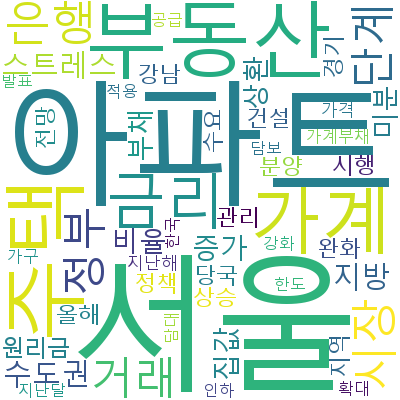

In [15]:
# WordCloud 라이브러리를 임포트합니다: 텍스트 데이터의 빈도수를 시각화하기 위한 도구입니다.
from wordcloud import WordCloud

# 한글 폰트 경로를 지정합니다. WordCloud에서 한글을 정상적으로 표시하기 위한 준비 단계입니다.
font_path = 'malgun.ttf'

# WordCloud 객체를 생성합니다. 여기서는 배경색을 흰색으로, 최대 단어 수를 50개로 설정합니다.
wc = WordCloud(background_color='white', max_words=50, font_path=font_path,width=400, height=400)

# 단어 빈도 사전을 생성합니다. 이는 WordCloud 생성에 사용될 데이터입니다.
count_dic = dict(zip(word_count_tf['word'], word_count_tf['freq']))

# WordCloud를 이용해 단어 빈도를 시각화합니다. 이는 가장 많이 사용된 단어를 시각적으로 확인하기 위한 단계입니다.
cloud = wc.fit_words(count_dic)
cloud.to_file('word_cloud.png')
cloud.to_image()

In [25]:
!pip install pyldavis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 84.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_versio

In [16]:
# LDA 분석을 위한 라이브러리 임포트
import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
import pyLDAvis

In [17]:
# df['tot_data'] 리스트에 저장된 텍스트 데이터(예: '제목_본문')를 공백 기준으로 분할하여 토큰 리스트를 생성합니다.
token = [keywords.split() for keywords in df['tot_data']]
# 토큰 리스트를 기반으로 Gensim의 Dictionary 객체를 생성합니다. 이 객체는 각 토큰에 고유한 ID를 매핑합니다.
# 결과적으로, 텍스트 데이터의 모든 유니크한 단어가 ID와 함께 딕셔너리로 관리됩니다.
id2word = corpora.Dictionary(token)

# 딕셔너리에서 빈도수 기반으로 단어를 필터링합니다. no_below와 no_above 파라미터를 사용하여,
# 너무 드물게 나타나는 단어(no_below 이하)와 너무 자주 나타나는 단어(no_above 이상)를 제거합니다.
# no_below=3는 각 단어가 최소 3개의 문서에 나타나야 함을 의미합니다.
# no_above=0.1는 전체 문서의 10% 미만에만 나타나는 단어를 유지함을 의미합니다.
id2word.filter_extremes(no_below=5, no_above=0.2)

# 최종적으로, 각 문서를 (단어 ID, 단어 빈도) 튜플의 리스트로 변환하는 문서-단어 빈도 매트릭스(corpus)를 생성합니다.
# 이 과정에서 각 문서 내에 있는 단어들이 얼마나 자주 나타나는지를 기록합니다.
# 이 corpus는 텍스트 데이터를 기반으로 한 다양한 모델링 작업(예: LDA 주제 모델링)에 사용될 수 있습니다.
corpus= [id2word.doc2bow(text) for text in token]
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 3),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 2),
  (22, 1),
  (23, 1),
  (24, 1)],
 [(11, 2),
  (16, 1),
  (17, 2),
  (19, 2),
  (21, 1),
  (25, 2),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 1),
  (34, 1),
  (35, 2),
  (36, 2),
  (37, 1),
  (38, 1)],
 [(11, 2),
  (16, 1),
  (19, 2),
  (21, 1),
  (35, 1),
  (36, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 2),
  (49, 1),
  (50, 1),
  (51, 2),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1)],
 [(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (6, 1),
  (7, 1),
  (9, 1),
  (10, 2),
  (11, 2),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (

In [18]:
# numpy 라이브러리를 np라는 이름으로 가져옵니다. numpy는 다양한 수학적 연산을 위해 사용됩니다.
import numpy as np

perplexity_values = []

# 토픽의 수를 3에서 9까지 변화시키면서 LDA 모델의 퍼플렉시티를 계산합니다.
# 토픽 수가 변할 때마다 모델의 성능을 퍼플렉시티를 통해 평가합니다.
for i in range(3, 10):
    # LDA 모델을 생성합니다. 'num_topics=i'는 토픽의 수를 i로 설정합니다.
    # 'id2word'는 단어의 인덱스 매핑을 나타내는 사전입니다.
    # 'random_state=100'는 모델 결과의 재현 가능성을 위해 난수 생성기의 시드를 설정합니다.
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word, random_state=100)

    # 모델의 로그 퍼플렉시티를 계산하고, 이를 자연로그의 밑인 e를 기반으로 하는 지수 함수로 변환하여
    # 퍼플렉시티를 계산합니다. 퍼플렉시티 값이 낮을수록 모델이 데이터를 더 잘 설명하고 있다는 의미입니다.
    perplexity = np.exp(ldamodel.log_perplexity(corpus))

    # 계산된 퍼플렉시티를 리스트에 추가합니다.
    perplexity_values.append(perplexity)

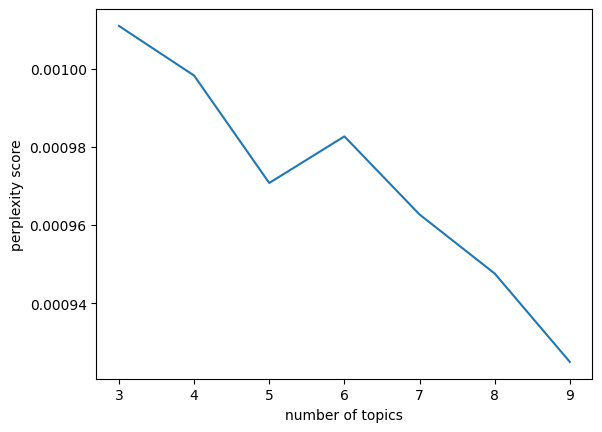

In [19]:
# Perplexity 그래프 시각화
import matplotlib.pyplot as plt

x = range(3, 10)
plt.plot(x, perplexity_values)
plt.xlabel("number of topics")
plt.ylabel("perplexity score")
plt.show()

In [20]:
from gensim.models import CoherenceModel  # CoherenceModel 임포트

coherence_values = []
# 다양한 토픽 수에 대해 Coherence 계산
for i in range(3, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word=id2word,random_state=100)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=token, dictionary=id2word, topn=10)
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

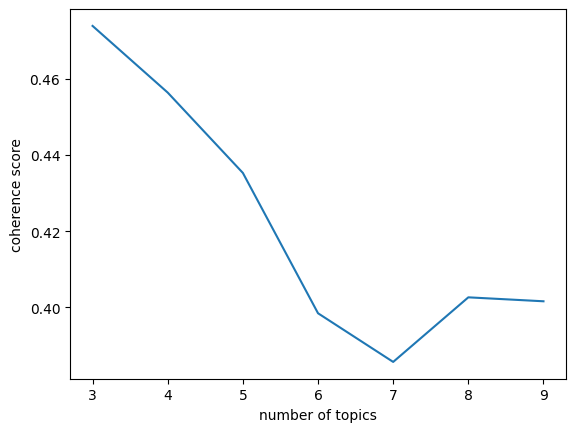

In [21]:
x = range(3, 10)
plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()

In [22]:
# Max(coherence), Min(perplexity) 만족하는 적절 k 설정
k=5

In [23]:
#적정토픽에 해당 되는 단어를 구하기!
from gensim import corpora, models
# 적절한 토픽 수를 설정하여 LDA 모델 훈련
model = LdaModel(corpus=corpus, num_topics=k, id2word=id2word, passes=15, random_state=100)
# num_topic에 적절 토픽 수 설정
topics=model.print_topics(num_words=15)
 ####토픽당 단어수설정

In [24]:
topics

[(0,
  '0.053*"\'미분\'," + 0.040*"\'지방\'," + 0.032*"\'건설\'," + 0.021*"\'경기\'," + 0.020*"\'완화\'," + 0.018*"\'수도권\'," + 0.016*"\'대책\'," + 0.016*"\'분양\'," + 0.014*"\'가구\'," + 0.012*"\'준공\'," + 0.011*"\'지역\'," + 0.011*"\'악성\'," + 0.011*"\'청약\'," + 0.009*"\'방안\'," + 0.008*"\'침체\',"'),
 (1,
  '0.045*"\'은행\'," + 0.026*"\'관리\'," + 0.024*"\'당국\'," + 0.020*"\'증가\'," + 0.018*"\'가계부채\'," + 0.015*"\'한도\'," + 0.014*"\'시행\'," + 0.014*"\'올해\'," + 0.013*"\'담보\'," + 0.012*"\'담대\'," + 0.010*"\'위원회\'," + 0.009*"\'은행권\'," + 0.009*"\'시중\'," + 0.009*"\'인하\'," + 0.008*"\'적용\',"'),
 (2,
  '0.025*"\'정책\'," + 0.017*"\'경제\'," + 0.015*"\'완화\'," + 0.012*"\'국민\'," + 0.010*"\'대통령\'," + 0.010*"\'관련\'," + 0.009*"\'불확실\'," + 0.009*"\'국회\'," + 0.008*"\'방송\'," + 0.008*"\'대선\'," + 0.008*"\'이재명\'," + 0.007*"\'탄핵\'," + 0.007*"\'정치\'," + 0.007*"\'내용\'," + 0.007*"\'사태\',"'),
 (3,
  '0.047*"\'거래\'," + 0.023*"\'지난해\'," + 0.018*"\'매매\'," + 0.016*"\'개월\'," + 0.015*"\'강남\'," + 0.014*"\'가격\'," + 0.013*"\'증가\'," + 0.013*"\'하락\'," + 0.

In [25]:
# 도출된 토픽을 CSV 파일로 저장
TOPIC={'topics':topics}
TOPIC=pd.DataFrame(TOPIC)
TOPIC.to_csv('lda_result.csv',encoding='cp949')

In [26]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook() # Jupyter Notebook에서 pyLDAvis 시각화를 사용할 수 있도록 설정
# pyLDAvis를 이용해 LDA 모델 시각화
vis = pyLDAvis.gensim.prepare(model, corpus, id2word)
vis  # 시각화 객체 출력

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.033898 -0.211642       1        1  26.394448
3      0.244338  0.068739       2        1  21.595141
0     -0.170375  0.213814       3        1  20.354621
4      0.122322  0.003314       4        1  19.494999
2     -0.162387 -0.074225       5        1  12.160792, topic_info=       Term         Freq        Total Category  logprob  loglift
954   '미분',  1018.000000  1018.000000  Default  30.0000  30.0000
230   '거래',   959.000000   959.000000  Default  29.0000  29.0000
117   '은행',  1108.000000  1108.000000  Default  28.0000  28.0000
148   '지방',   880.000000   880.000000  Default  27.0000  27.0000
62    '건설',   620.000000   620.000000  Default  26.0000  26.0000
...     ...          ...          ...      ...      ...      ...
1270  '병환',    58.643923   156.722132   Topic5  -5.2635   1.1240
144   '위해',    65.232977   344.402428   Topic5  -5.1570   0.4431
1710  '정국',    52.211517   121.833936   Topic5  -5.3797   1.2596
343   '한국',    58.234827   365.303691   Topic5  -5.2705   0.2707
161   '올해',    59.639024   673.778905   Topic5  -5.2467  -0.3176

[344 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
204       1  0.004091    '가격',
204       2  0.582922    '가격',
204       3  0.010227    '가격',
204       4  0.368161    '가격',
204       5  0.034771    '가격',
...     ...       ...      ...
583       1  0.982814   ['은행',
2151      5  0.961844   ['이복',
1552      2  0.948984   ['작년',
1610      2  0.965884  ['지난해',
959       3  0.996545   ['지방',

[659 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3])